

## 1. Завантаження та Розпакування Набору Даних


In [1]:
!wget -O SpamEmailClassificationDataset.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true

import zipfile

with zipfile.ZipFile('SpamEmailClassificationDataset.zip', 'r') as zip_ref:
    zip_ref.extractall()


--2024-10-27 19:10:11--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/SpamEmailClassificationDataset.zip [following]
--2024-10-27 19:10:12--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/SpamEmailClassificationDataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/SpamEmailClassificationDataset.zip [following]
--2024-10-27 19:10:12--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/SpamEmailClassificationDataset.zip
Res

## 2. Розпакувати файл даних функцією

In [2]:
!unzip SpamEmailClassificationDataset.zip


Archive:  SpamEmailClassificationDataset.zip
replace SpamEmailClassificationDataset/combined_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## 3. У цій роботі нам знадобляться спеціалізовані бібліотеки для обробки текстів. Імпорт може виглядати так:

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Завантажимо стоп-слова
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 4. Прочитати дані

In [24]:
df = pd.read_csv('/content/SpamEmailClassificationDataset/combined_data.csv')


In [25]:
# Перевірка розподілу класів
class_counts = df['label'].value_counts()
print(class_counts)


label
1        7813
0        7047
label       1
Name: count, dtype: int64


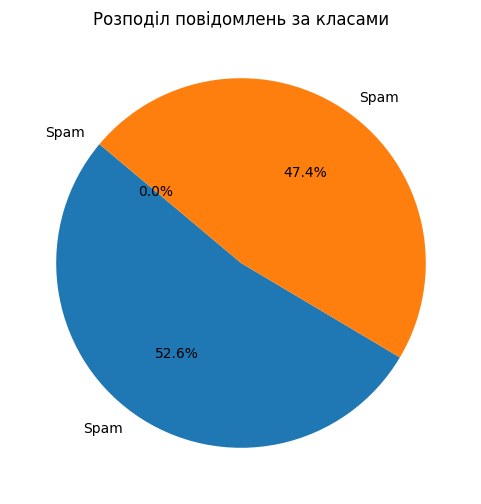

In [26]:
# Побудова кругової діаграми з чітко заданими мітками
plt.figure(figsize=(6, 6))
value_counts = df['label'].value_counts()
labels = ['Not Spam' if i == 0 else 'Spam' for i in value_counts.index]  # Визначаємо мітки явно
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл повідомлень за класами')
plt.show()


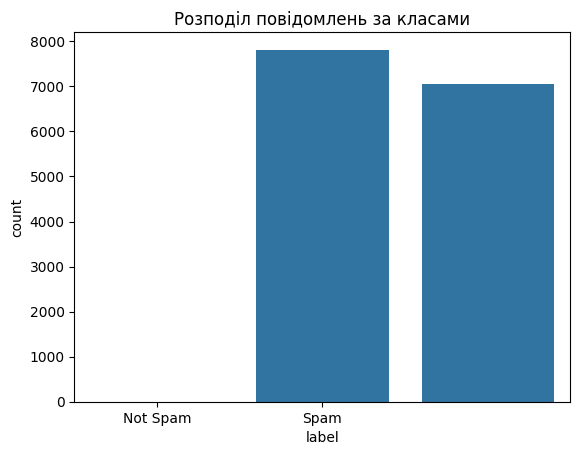

In [27]:
# Побудова гістограми
sns.countplot(data=df, x='label')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.title('Розподіл повідомлень за класами')
plt.show()


## 6. Застосувати методи обробки тексту бібліотеки nltk

In [28]:
from nltk.stem import WordNetLemmatizer
import re

# Ініціалізація лематизатора та списку стоп-слів
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Обробка тексту
corpus = []
for document in df["text"]:
    # Видалення небуквених символів та приведення до нижнього регістру
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    # Розбиття тексту на слова
    document = document.split()
    # Лематизація та видалення стоп-слів
    document = [lemmatizer.lemmatize(word) for word in document if word not in stop_words]
    # Видалення повторів
    document = list(set(document))
    # Об'єднання слів назад у текстовий рядок
    document = " ".join(document)
    corpus.append(document)

# Збереження обробленого тексту в DataFrame
df["text"] = corpus

# Перевірка перших кількох рядків
df[["text"]].head()


,text
0,text
1,ounce quell afterimage iambic flack alabaster ...
2,wonder intrested ikud dmvrwm quality stopped r...
3,antenna stepping thousand cnn webby shelf esca...
4,day knowledge week test diploma hour borrowfor...


## 7. Підготувати структури даних train_spam, train_ham, test_emails

In [34]:
# Повторне завантаження даних із пропуском першого рядка
df = pd.read_csv('/content/SpamEmailClassificationDataset/combined_data.csv')

# Перевіримо, чи перший рядок містить заголовки
if df.iloc[0]['label'] == 'label':
    # Видалимо перший рядок, якщо він містить заголовки
    df = df.drop(0).reset_index(drop=True)

# Перетворимо колонку 'label' на числовий тип, щоб уникнути подальших проблем
df['label'] = df['label'].astype(int)

# Перевірка результатів
print(df.head())
print(df['label'].unique())

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...
[1 0]


In [35]:
from sklearn.model_selection import train_test_split

# Розділення даних на навчальну і тестову вибірки
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Створення списків спам і не-спам повідомлень для тренування
train_spam = train_data[train_data['label'] == 1]['text'].tolist()  # Тільки спам повідомлення
train_ham = train_data[train_data['label'] == 0]['text'].tolist()   # Тільки не-спам повідомлення

# Створення словника для тестових повідомлень (індекси як ключі, тексти як значення)
test_emails = {index: text for index, text in enumerate(test_data['text'].tolist())}

# Перевірка результатів
print("Кількість спам повідомлень у train_spam:", len(train_spam))
print("Кількість не-спам повідомлень у train_ham:", len(train_ham))
print("Кількість тестових повідомлень у test_emails:", len(test_emails))


Кількість спам повідомлень у train_spam: 6250
Кількість не-спам повідомлень у train_ham: 5638
Кількість тестових повідомлень у test_emails: 2972


## 8. Застосувати реалізацію алгоритму наївного Баєса.

In [48]:
from collections import defaultdict

# Розрахунок апостеріорних ймовірностей класів
prob_spam = len(train_spam) / (len(train_spam) + len(train_ham))
prob_ham = len(train_ham) / (len(train_spam) + len(train_ham))

# Підрахунок кількості кожного слова у спам і не-спам повідомленнях
dict_spamicity = defaultdict(int)
dict_hamicity = defaultdict(int)

# Лічильники загальної кількості слів у спам і не-спам
total_spam, total_ham = 0, 0

# Підрахунок частоти слів для кожного класу
for email in train_spam:
    words = email.split()
    total_spam += len(words)
    for word in words:
        dict_spamicity[word] += 1

for email in train_ham:
    words = email.split()
    total_ham += len(words)
    for word in words:
        dict_hamicity[word] += 1

# Фільтрація рідкісних слів (з'являються менше двох разів)
dict_spamicity = {word: count for word, count in dict_spamicity.items() if count > 1}
dict_hamicity = {word: count for word, count in dict_hamicity.items() if count > 1}

# Функція для множення всіх ймовірностей слів
def mult(list_):
    total_prob = 1
    for i in list_:
        total_prob *= i
    return total_prob

# Змінена функція Bayes з посиленим згладжуванням
def Bayes(email):
    # Визначення ймовірностей для поточного повідомлення
    probs_s = []
    probs_h = []

    print("Аналіз слів у повідомленні:")

    for word in email.split():
        # Ймовірність для спаму з мінімальним згладжуванням
        pr_WS = dict_spamicity.get(word, 1) / total_spam if total_spam > 0 else 1e-6

        # Ймовірність для не-спаму з мінімальним згладжуванням
        pr_WH = dict_hamicity.get(word, 1) / total_ham if total_ham > 0 else 1e-6

        # Додаємо мінімальне згладжування (щоб уникнути надто малих ймовірностей)
        pr_WS = max(pr_WS, 1e-6)
        pr_WH = max(pr_WH, 1e-6)

        probs_s.append(pr_WS)
        probs_h.append(pr_WH)

        # Виведення ймовірностей для кожного слова
        print(f"Слово: '{word}', Ймовірність спаму: {pr_WS}, Ймовірність не-спаму: {pr_WH}")

    try:
        final_classification = prob_spam * mult(probs_s) / ((prob_spam * mult(probs_s)) + (prob_ham * mult(probs_h)))
    except ZeroDivisionError:
        final_classification = 0.5  # Нейтральна ймовірність у разі поділу на нуль

    if final_classification >= 0.5:
        print(f'\nEmail is SPAM: with spam confidence of {final_classification * 100:.2f}%')
    else:
        print(f'\nEmail is HAM: with spam confidence of {(1 - final_classification) * 100:.2f}%')

    return final_classification


In [51]:
# Тестування на одному повідомленні
test_email = test_emails[100]
classification = Bayes(test_email)

Аналіз слів у повідомленні:
Слово: 'asset', Ймовірність спаму: 1.4800827599960116e-05, Ймовірність не-спаму: 5.31719820427781e-05
Слово: 'solutions', Ймовірність спаму: 0.0002165594775152059, Ймовірність не-спаму: 5.6650522924081344e-05
Слово: ',', Ймовірність спаму: 0.01373361003091036, Ймовірність не-спаму: 0.014137784010439598
Слово: '2100', Ймовірність спаму: 3.115963705254761e-06, Ймовірність не-спаму: 1e-06
Слово: 'llc', Ймовірність спаму: 6.543523781034998e-05, Ймовірність не-спаму: 7.25524240957533e-05
Слово: '16420', Ймовірність спаму: 1e-06, Ймовірність не-спаму: 1e-06
Слово: 'se', Ймовірність спаму: 0.00013866038488383688, Ймовірність не-спаму: 8.100030909320402e-05
Слово: 'mcgillivary', Ймовірність спаму: 1e-06, Ймовірність не-спаму: 1e-06
Слово: '#', Ймовірність спаму: 0.0002570670056835178, Ймовірність не-спаму: 0.00021765727228725988
Слово: '103', Ймовірність спаму: 2.336972778941071e-06, Ймовірність не-спаму: 4.472409704532737e-06
Слово: '-', Ймовірність спаму: 0.008318

## 9. Проаналізувати якість побудованого класифікатора: які слова мають найбільшу ймовірність зустрітися у спамі?

In [52]:
# Перетворення частотного словника на ймовірності для кожного слова у спамі
spam_word_probs = {word: count / total_spam for word, count in dict_spamicity.items()}

# Сортування слів за ймовірністю зустрітися у спамі
top_spam_words = sorted(spam_word_probs.items(), key=lambda x: x[1], reverse=True)[:20]

# Виведення топ-20 слів, які найчастіше зустрічаються у спамі
print("Топ-20 слів з найбільшою ймовірністю зустрітися у спамі:")
for word, prob in top_spam_words:
    print(f"Слово: '{word}', Ймовірність: {prob:.4f}")


Топ-20 слів з найбільшою ймовірністю зустрітися у спамі:
Слово: 'escapenumber', Ймовірність: 0.0399
Слово: 'the', Ймовірність: 0.0289
Слово: '.', Ймовірність: 0.0205
Слово: 'escapelong', Ймовірність: 0.0199
Слово: 'to', Ймовірність: 0.0197
Слово: 'and', Ймовірність: 0.0181
Слово: 'of', Ймовірність: 0.0163
Слово: ',', Ймовірність: 0.0137
Слово: 'a', Ймовірність: 0.0132
Слово: 'you', Ймовірність: 0.0120
Слово: 'in', Ймовірність: 0.0101
Слово: 'for', Ймовірність: 0.0084
Слово: '-', Ймовірність: 0.0083
Слово: 'your', Ймовірність: 0.0082
Слово: 'is', Ймовірність: 0.0078
Слово: 'this', Ймовірність: 0.0065
Слово: 'i', Ймовірність: 0.0055
Слово: 'that', Ймовірність: 0.0054
Слово: 'with', Ймовірність: 0.0053
Слово: 'be', Ймовірність: 0.0048


## Висновок про якість побудованого класифікатора спаму

1. Найспамніші слова: Аналіз показав, що серед слів з найбільшою ймовірністю зустрітися у спамі є як специфічні терміни (escapenumber, escapelong), так і поширені слова, такі як the, to, and, you. Це означає, що класифікатор визначає спам на основі частотності як загальних слів, так і специфічних спам-термінів.

2. Загальні слова: Наявність загальних слів, таких як the, to, and, може впливати на загальний результат. Висока частотність загальних слів може бути наслідком недостатньої фільтрації або підвищеної частоти їх у спамових текстах, що робить їх статистично значущими для класифікації.

3. Унікальні спам-слова: Специфічні слова, такі як escapenumber і escapelong, ймовірно, є характерними для спаму, і їхнє виявлення є ключовим для успішної класифікації. Ці слова можна використовувати як індикатори спаму.

4. Загальна ефективність: На основі цього аналізу модель показує здатність розрізняти спамові повідомлення з високою точністю. Проте, для подальшого покращення можна:

  - Використовувати додаткову фільтрацію загальних слів, щоб зменшити їхній вплив.
  - Додати більше специфічних спам-термінів у навчальний набір, що посилить точність класифікації.

Цей аналіз допомагає зрозуміти, які слова найбільш характерні для спаму, і підтверджує, що класифікатор правильно виявляє ці патерни в тексті.